In [361]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

# ETL

# Dataset 1 - COLET

In [362]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '17.csv',
 '18.csv',
 '19.csv',
 '2.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 '39.csv',
 '4.csv',
 '40.csv',
 '41.csv',
 '42.csv',
 '43.csv',
 '44.csv',
 '45.csv',
 '46.csv',
 '47.csv',
 '48.csv',
 '49.csv',
 '5.csv',
 '50.csv',
 '51.csv',
 '52.csv',
 '53.csv',
 '54.csv',
 '55.csv',
 '56.csv',
 '57.csv',
 '59.csv',
 '6.csv',
 '60.csv',
 '61.csv',
 '62.csv',
 '63.csv',
 '64.csv',
 '65.csv',
 '66.csv',
 '67.csv',
 '68.csv',
 '69.csv',
 '7.csv',
 '8.csv',
 '85238500',
 '9.csv',
 'A2 Updated Copy.ipynb',
 'A2_220477645_2022.ipynb',
 'A2_WIP.ipynb',
 'Archive',
 'C0102100',
 'Colet',
 'Data temp',
 'data.mat',
 'DBSCAN.ipynb',
 'EnsembleLearning.ipynb',
 'important.txt',
 'keras_ensemblng-master',
 'keras_ensemblng-master.zip',
 'lo

In [363]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_10.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_13.xlsx',
 'Task1_Subject_14.xlsx',
 'Task1_Subject_15.xlsx',
 'Task1_Subject_16.xlsx',
 'Task1_Subject_17.xlsx',
 'Task1_Subject_18.xlsx',
 'Task1_Subject_19.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_20.xlsx',
 'Task1_Subject_21.xlsx',
 'Task1_Subject_22.xlsx',
 'Task1_Subject_23.xlsx',
 'Task1_Subject_24.xlsx',
 'Task1_Subject_25.xlsx',
 'Task1_Subject_26.xlsx',
 'Task1_Subject_27.xlsx',
 'Task1_Subject_28.xlsx',
 'Task1_Subject_29.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_30.xlsx',
 'Task1_Subject_31.xlsx',
 'Task1_Subject_32.xlsx',
 'Task1_Subject_33.xlsx',
 'Task1_Subject_34.xlsx',
 'Task1_Subject_35.xlsx',
 'Task1_Subject_36.xlsx',
 'Task1_Subject_37.xlsx',
 'Task1_Subject_38.xlsx',
 'Task1_Subject_39.xlsx',
 'Task1_Subject_4.xlsx',
 'Task1_Subject_40.xlsx',
 'Task1_Subject_41.xlsx',
 'Task1_Subject_42.xlsx',
 'Task1_Subject_43.xlsx',
 'Task1_Subject_

In [364]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [365]:
#loop through files - use read_excel - note sheet name 

#c stands for COLET

for f in files_xlsx:
    #data = pd.read_excel(f)
    data1 = pd.read_excel(f, sheet_name = 0)
    data1['file'] = f
    c_gaze_task1 = c_gaze_task1.append(data1)

In [366]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.132854,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.130390,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx


In [367]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    c_gaze_task2 = c_gaze_task2.append(data2)
   

In [368]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,228504.268961,169,0.556724,0.481309,0.600110,'228504.268961-0',-8.319053,-53.813592,386.637142,199.196377,...,-0.415031,0.068077,0.907257,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5401,228504.277133,170,0.532541,0.455582,0.613673,'228504.277133-0',-24.112588,-57.702254,379.354003,199.196377,...,-0.446618,0.060300,0.892691,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5402,228504.279693,170,0.997051,0.457765,0.590002,'228504.284804-0 228504.274583-1',-8.856885,-19.243240,148.062316,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.178785,-0.184018,0.966526,Task1_Subject_9.xlsx
5403,228504.282918,170,0.997780,0.452818,0.595424,'228504.284804-0 228504.28103299998-1',-10.838604,-21.549988,159.535551,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.157374,-0.184781,0.970098,Task1_Subject_9.xlsx


In [369]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    c_gaze_task3 = c_gaze_task3.append(data3)
   

In [370]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,227926.280984,351,0.999084,0.577568,0.515940,'227926.28500399998-0 227926.27696299998-1',18.936924,-8.713000,140.128402,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.303512,-0.122491,0.944921,Task1_Subject_9.xlsx
15191,227926.285003,352,0.998244,0.579733,0.519930,'227926.28500399998-0 227926.285002-1',19.059397,-9.049177,137.359910,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.309119,-0.131280,0.941919,Task1_Subject_9.xlsx
15192,227926.289027,352,0.996593,0.581765,0.516821,'227926.28500399998-0 227926.293051-1',19.106148,-8.476573,134.455112,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx
15193,227926.293049,352,0.996438,0.582387,0.518000,'227926.29304699998-0 227926.293051-1',19.340557,-8.665963,135.113591,21.858422,...,-0.017040,-0.163435,0.986407,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx


In [371]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    c_gaze_task4 = c_gaze_task4.append(data4)
   

In [372]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,222043.332706,272,0.999866,0.515607,0.439272,'222043.33090499998-0 222043.334508-1',3.434937,0.810220,101.123017,19.681803,...,-0.131417,-0.123440,0.983612,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16689,222043.336530,273,0.999767,0.514888,0.438728,'222043.33855199997-0 222043.334508-1',3.305292,0.857062,100.751790,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16690,222043.340519,273,0.999846,0.514192,0.439384,'222043.33855199997-0 222043.34248599998-1',3.213693,0.802417,101.432418,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx
16691,222043.344584,273,0.999875,0.508943,0.436278,'222043.346681-0 222043.34248599998-1',2.293070,1.059562,98.765386,19.681803,...,-0.143193,-0.123958,0.981901,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx


In [373]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    c_pupil_task1 = c_pupil_task1.append(data5)
   

In [374]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1.0,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1.0,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0.0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0.0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1.0,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,228321.647848,203,1.0,0.999606,0.426659,0.77834,24.352078,'3d c++',81.918465,42.558716,...,-0.780547,2.011465,1.377815,-2.222073,119.742628,62.863100,119.966404,119.966404,90.0,Task1_Subject_9.xlsx
14564,228321.653339,203,0.0,0.998394,0.255469,0.366622,27.203977,'3d c++',49.049963,121.608670,...,-0.829398,2.073524,1.875600,-2.087452,87.795905,97.738241,127.903724,127.903724,90.0,Task1_Subject_9.xlsx
14565,228321.653339,203,0.0,1.000000,0.255535,0.366481,27.202360,'2d c++',49.062664,121.635742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
14566,228321.653422,203,1.0,1.000000,0.427468,0.778334,24.366371,'2d c++',82.073883,42.559826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [375]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    c_pupil_task2 = c_pupil_task2.append(data6)
   

In [376]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,228504.277133,170,0,0.532541,0.241354,0.372993,29.150211,'3d c++',46.340059,120.385292,...,-0.821699,1.978581,1.833248,-2.124023,91.946413,97.273119,140.664522,140.664522,90.0,Task1_Subject_9.xlsx
10806,228504.281033,170,1,0.997363,0.439062,0.773366,26.222113,'3d c++',84.299861,43.513771,...,-0.802517,1.880712,1.371450,-2.182395,124.057740,66.722506,134.132280,134.132280,90.0,Task1_Subject_9.xlsx
10807,228504.281033,170,1,1.000000,0.439124,0.773477,26.256786,'2d c++',84.311890,43.492386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
10808,228504.284804,170,0,0.990000,0.243847,0.375693,28.903830,'2d c++',46.818550,119.867004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [377]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    c_pupil_task3 = c_pupil_task3.append(data7)
   

In [378]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,227926.293047,352,0,1.000000,0.348153,0.406389,29.538328,'2d c++',66.845345,113.973282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30390,227926.293051,352,1,0.993435,0.207927,0.697924,25.591635,'3d c++',39.921905,57.998587,...,-0.724845,2.155768,1.490398,-2.327368,89.393333,68.655088,120.008688,120.008688,90.0,Task1_Subject_9.xlsx
30391,227926.293051,352,1,1.000000,0.207900,0.697688,25.531675,'2d c++',39.916801,58.043934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30392,227926.300983,352,0,1.000000,0.348298,0.406876,29.606018,'2d c++',66.873276,113.879822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [379]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    c_pupil_task4 = c_pupil_task4.append(data8)
   

In [380]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0.0,1.0,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0.0,1.0,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0.0,0.0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0.0,0.0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0.0,1.0,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20793,228726.478543,259.0,1.0,0.999965,0.378432,0.739606,24.790353,'3d c++',72.658891,49.995616,...,-0.711201,1.791460,1.425259,-2.339517,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20794,228726.489491,259.0,1.0,1.000000,0.379734,0.742002,25.275154,'2d c++',72.908890,49.535595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
20795,228726.489491,259.0,1.0,0.999555,0.379731,0.741950,25.261811,'3d c++',72.908278,49.545545,...,-0.713090,1.824365,1.420014,-2.335953,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20796,228726.490165,259.0,0.0,0.998256,0.230248,0.363101,28.222856,'3d c++',44.207595,122.284655,...,-0.892675,1.676591,1.795483,-1.984366,86.552960,98.969429,153.198023,153.198023,90.0,Task1_Subject_9.xlsx


In [381]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    c_blinks_task1 = c_blinks_task1.append(data9)
   

In [382]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,471465.723115,0.252434,471465.975549,21,24,28,0.659305,'0.53595171449361 0.5822480107899064 0.6061400...,'471465.723115 471465.731078 471465.7310899999...,Task1_Subject_10.xlsx
0,1,8419.904790,0.203903,8420.108693,16,19,22,0.671161,'0.5366363953239319 0.5810808397683763 0.62552...,'8419.90479 8419.908641 8419.912594000001 8419...,Task1_Subject_11.xlsx
1,2,8422.874139,0.166438,8423.040577,105,107,110,0.541905,'0.5358719345469952 0.5803163789914397 0.62476...,'8422.874139000001 8422.877731 8422.8813280000...,Task1_Subject_11.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
3,1,215463.331418,0.183987,215463.515405,114,116,119,0.538360,'0.5203294699020639 0.5685961329456514 0.61091...,'215463.331418 215463.339472 215463.339475 215...,Task1_Subject_7.xlsx
4,1,215470.303547,0.152408,215470.455955,15,17,20,0.525319,'0.5363596149578365 0.546571596185153 0.598641...,'215470.303547 215470.303547 215470.3141669999...,Task1_Subject_7.xlsx
5,2,215471.607640,0.188571,215471.796211,54,57,60,0.581745,'0.5300262745445266 0.576322570840823 0.589166...,'215471.60763999997 215471.611499 215471.61552...,Task1_Subject_7.xlsx
0,1,228310.213116,0.187728,228310.400844,27,30,33,0.604759,'0.545336021138829 0.591632317435125 0.6379286...,'228310.213116 228310.219892 228310.2210439999...,Task1_Subject_9.xlsx


In [383]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    c_blinks_task2 = c_blinks_task2.append(data10)
   

In [384]:
c_blinks_task2

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,95216.515489,0.175822,95216.691311,154,156,159,0.536885,'0.5154108544114466 0.5598552988558911 0.58607...,'95216.515489 95216.519392 95216.5233 95216.52...,Task1_Subject_14.xlsx
0,1,617116.043208,0.175051,617116.218259,6,8,11,0.495686,'0.5000056967831534 0.5444501412275978 0.58889...,'617116.043208 617116.043329 617116.048553 617...,Task1_Subject_15.xlsx
1,2,617121.155372,0.199941,617121.355313,159,162,165,0.538263,'0.5166209589605074 0.5270727373215381 0.57151...,'617121.155372 617121.163344 617121.163349 617...,Task1_Subject_15.xlsx
2,1,617127.540933,0.186037,617127.726970,134,137,140,0.465043,'0.5128925883496019 0.5573370327940463 0.57356...,'617127.540933 617127.541735 617127.552534 617...,Task1_Subject_15.xlsx
3,1,617131.635255,0.197271,617131.832526,56,58,61,0.542619,'0.5123239293892733 0.5196223491222396 0.52619...,'617131.635255 617131.635277 617131.6432619999...,Task1_Subject_15.xlsx
4,2,617135.069220,0.166070,617135.235290,158,160,163,0.479600,'0.5225308452401866 0.5669752896846311 0.56898...,'617135.06922 617135.076621 617135.076621 6171...,Task1_Subject_15.xlsx
5,1,617138.583431,0.183602,617138.767033,71,73,76,0.521224,'0.5066102033438776 0.507054647788322 0.551499...,'617138.583431 617138.591269 617138.591269 617...,Task1_Subject_15.xlsx
6,2,617140.463329,0.188148,617140.651477,127,130,133,0.499640,'0.50030099971071 0.5447454441551542 0.5514020...,'617140.4633289999 617140.471147 617140.471152...,Task1_Subject_15.xlsx
7,1,617143.772057,0.235197,617144.007254,86,89,93,0.540647,'0.5091624310178605 0.542546984609271 0.586991...,'617143.772057 617143.772064 617143.780802 617...,Task1_Subject_15.xlsx
0,1,686020.432159,0.124183,686020.556342,4,6,8,0.298729,'0.5420785345170478 0.588374830813344 0.584448...,'686020.432159 686020.436547 686020.440508 686...,Task1_Subject_16.xlsx


In [385]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    c_blinks_task3 = c_blinks_task3.append(data11)
   

In [386]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
14,2,227905.829044,0.156031,227905.985075,40,42,44,0.503004,'0.5364642300849053 0.5537179306930612 0.56773...,'227905.82904399998 227905.833184 227905.83983...,Task1_Subject_9.xlsx
15,3,227907.771639,0.189371,227907.961010,98,100,103,0.593344,'0.5201340369365625 0.566430333232859 0.612726...,'227907.77163899998 227907.77419599998 227907....,Task1_Subject_9.xlsx
16,1,227917.701956,0.167014,227917.868970,96,98,101,0.536342,'0.5121475304497234 0.5584438267460199 0.60474...,'227917.70195599998 227917.70895899998 227917....,Task1_Subject_9.xlsx
17,2,227919.121020,0.183983,227919.305003,138,141,144,0.598228,'0.5153427691335349 0.5616390654298312 0.58871...,'227919.12102 227919.12117199998 227919.128994...,Task1_Subject_9.xlsx


In [387]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    c_blinks_task4 = c_blinks_task4.append(data12)
   

In [388]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,471222.515343,0.239907,471222.755250,94,97,101,0.511628,'0.5026035826318781 0.5494024926669058 0.58377...,'471222.515343 471222.51915 471222.52468 47122...,Task1_Subject_10.xlsx
1,2,471223.659432,0.299866,471223.959298,128,132,137,0.472412,'0.5042939318550955 0.5434117582109237 0.57889...,'471223.659432 471223.667471 471223.6674899999...,Task1_Subject_10.xlsx
2,3,471224.807449,0.167811,471224.975260,163,165,168,0.499396,'0.5350690223532087 0.5840362195594939 0.61723...,'471224.807449 471224.811361 471224.815142 471...,Task1_Subject_10.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
8,3,228712.420777,0.168113,228712.588890,287,289,292,0.554141,'0.5037201405857574 0.5500164368820537 0.59631...,'228712.420777 228712.420938 228712.428812 228...,Task1_Subject_9.xlsx
9,1,228718.560785,0.132246,228718.693031,23,25,27,0.417348,'0.531989059581162 0.5406546851960738 0.548623...,'228718.56078499998 228718.56080099999 228718....,Task1_Subject_9.xlsx
10,2,228719.464743,0.168152,228719.632895,50,52,55,0.534863,'0.5009343921762599 0.5472306884725565 0.57108...,'228719.464743 228719.46478399998 228719.47291...,Task1_Subject_9.xlsx
11,3,228719.940827,0.164094,228720.104921,64,66,69,0.507862,'0.5114266499435292 0.5577229462398255 0.58064...,'228719.94082699998 228719.94083399998 228719....,Task1_Subject_9.xlsx


In [389]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    c_annotation_task1 = c_annotation_task1.append(data13)
   

In [390]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,15,5,5,35,5,35,16.7,Task1_Subject_10.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,15,15,5,15,15,5,11.7,Task1_Subject_13.xlsx
0,15,15,50,0,15,5,16.7,Task1_Subject_14.xlsx
0,95,100,5,95,95,5,65.8,Task1_Subject_15.xlsx
0,10,5,5,0,10,5,5.8,Task1_Subject_16.xlsx
0,65,85,25,30,60,10,45.8,Task1_Subject_17.xlsx
0,45,10,25,70,40,15,34.2,Task1_Subject_18.xlsx


In [391]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    c_annotation_task2 = c_annotation_task2.append(data14)
   

In [392]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,5,5,5,25,5,10,9.2,Task1_Subject_10.xlsx
0,50,25,45,15,35,5,29.2,Task1_Subject_11.xlsx
0,40,25,55,40,45,10,35.8,Task1_Subject_12.xlsx
0,15,15,15,30,30,5,18.3,Task1_Subject_13.xlsx
0,5,5,5,0,10,5,5.0,Task1_Subject_14.xlsx
0,100,5,100,0,90,30,54.2,Task1_Subject_15.xlsx
0,15,5,25,0,15,5,10.8,Task1_Subject_16.xlsx
0,60,10,55,15,40,10,31.7,Task1_Subject_17.xlsx
0,60,10,75,45,35,15,40.0,Task1_Subject_18.xlsx


In [393]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    c_annotation_task3 = c_annotation_task3.append(data15)
   

In [394]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,75,5,50,35,70,35,45.0,Task1_Subject_10.xlsx
0,90,15,85,35,85,75,64.2,Task1_Subject_11.xlsx
0,70,10,10,25,60,10,30.8,Task1_Subject_12.xlsx
0,60,35,20,40,60,5,36.7,Task1_Subject_13.xlsx
0,60,25,15,65,50,30,40.8,Task1_Subject_14.xlsx
0,90,5,15,65,70,51,49.3,Task1_Subject_15.xlsx
0,50,5,50,10,55,5,29.2,Task1_Subject_16.xlsx
0,70,10,30,20,75,15,36.7,Task1_Subject_17.xlsx
0,65,10,30,60,60,15,40.0,Task1_Subject_18.xlsx


In [395]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    c_annotation_task4 = c_annotation_task4.append(data16)
   

In [396]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,80,5,55,30,70,25,44.2,Task1_Subject_10.xlsx
0,85,10,95,40,90,70,65.0,Task1_Subject_11.xlsx
0,75,20,75,45,70,10,49.2,Task1_Subject_12.xlsx
0,70,25,50,50,65,50,51.7,Task1_Subject_13.xlsx
0,80,10,25,35,50,35,39.2,Task1_Subject_14.xlsx
0,100,5,100,50,100,95,75.0,Task1_Subject_15.xlsx
0,90,5,90,50,90,25,58.3,Task1_Subject_16.xlsx
0,90,10,55,30,60,40,47.5,Task1_Subject_17.xlsx
0,80,10,60,70,70,15,50.8,Task1_Subject_18.xlsx


In [397]:
#not going to use the below - don't think subject info is important to analysis but leaving code in here in case I change my mind 

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data = pd.read_excel(f, sheet_index = [16])
#    data['file'] = f
#    c_subjectinfo = df.append(data)
   

In [398]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_10.xlsx' 'Task1_Subject_11.xlsx'
 'Task1_Subject_12.xlsx' 'Task1_Subject_13.xlsx' 'Task1_Subject_14.xlsx'
 'Task1_Subject_15.xlsx' 'Task1_Subject_16.xlsx' 'Task1_Subject_17.xlsx'
 'Task1_Subject_18.xlsx' 'Task1_Subject_19.xlsx' 'Task1_Subject_2.xlsx'
 'Task1_Subject_20.xlsx' 'Task1_Subject_21.xlsx' 'Task1_Subject_22.xlsx'
 'Task1_Subject_23.xlsx' 'Task1_Subject_24.xlsx' 'Task1_Subject_25.xlsx'
 'Task1_Subject_26.xlsx' 'Task1_Subject_27.xlsx' 'Task1_Subject_28.xlsx'
 'Task1_Subject_29.xlsx' 'Task1_Subject_3.xlsx' 'Task1_Subject_30.xlsx'
 'Task1_Subject_31.xlsx' 'Task1_Subject_32.xlsx' 'Task1_Subject_33.xlsx'
 'Task1_Subject_34.xlsx' 'Task1_Subject_35.xlsx' 'Task1_Subject_36.xlsx'
 'Task1_Subject_37.xlsx' 'Task1_Subject_38.xlsx' 'Task1_Subject_39.xlsx'
 'Task1_Subject_4.xlsx' 'Task1_Subject_40.xlsx' 'Task1_Subject_41.xlsx'
 'Task1_Subject_42.xlsx' 'Task1_Subject_43.xlsx' 'Task1_Subject_44.xlsx'
 'Task1_Subject_45.xlsx' 'Task1_Subject_46.xlsx' 'Task1

In [399]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [5,10]]
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [400]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [401]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [402]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [403]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [404]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] / c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] / c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] / c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] / c_gaze_task4['sqrt']

In [405]:
# make a column with 1 or 0 for saccade

#may be able to drop this 

#task 1
#c_gaze_task1['saccade_flag'] = np.where(c_gaze_task1['velocity'] > 0.45, 1, 0)

#task 2
#c_gaze_task2['saccade_flag'] = np.where(c_gaze_task2['velocity'] > 0.45, 1, 0)

#task 3
#c_gaze_task3['saccade_flag'] = np.where(c_gaze_task3['velocity'] > 0.45, 1, 0)

#task 4
#c_gaze_task4['saccade_flag'] = np.where(c_gaze_task4['velocity'] > 0.45, 1, 0)

In [406]:
#fixation flag

#task 1
c_gaze_task1['fixation_flag'] = np.where((c_gaze_task1['velocity'] < 0.45) & (c_gaze_task1['gaze_diff']) > 0.55, 1, 0)

#task 2
c_gaze_task2['fixation_flag'] = np.where((c_gaze_task2['velocity'] < 0.45) & (c_gaze_task2['gaze_diff']) > 0.55, 1, 0)

#task 3
c_gaze_task3['fixation_flag'] = np.where((c_gaze_task3['velocity'] < 0.45) & (c_gaze_task3['gaze_diff']) > 0.55, 1, 0)

#task 4
c_gaze_task4['fixation_flag'] = np.where((c_gaze_task4['velocity'] < 0.45) & (c_gaze_task4['gaze_diff']) > 0.55, 1, 0)

In [407]:
#change into groups

#task 1
c_gaze_task1['fix_group'] = c_gaze_task1.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 2
c_gaze_task2['fix_group'] = c_gaze_task2.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 3
c_gaze_task3['fix_group'] = c_gaze_task3.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 4
c_gaze_task4['fix_group'] = c_gaze_task4.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

In [408]:
#creating our final flag - where there is a fixation group and there is a fixation

#task 1
c_gaze_task1['fixation_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task2['fixation_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task3['fixation_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task4['fixation_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] > 0), 1, 0)

In [409]:
#creating our final flag - fiation non group flag - i.e. is a fixation but not part of a group 

#task 1
c_gaze_task1['fix_non_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task2['fix_non_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task3['fix_non_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task4['fix_non_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] < 1), 1, 0)

In [410]:
c_gaze_task1

,gaze_timestamp,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,file,gaze_diff,x_diff,y_diff,z_diff,x_diff^2,y_diff^2,z_diff^2,sum,sqrt,velocity,fixation_flag,fix_group,fixation_group_flag,fix_non_group_flag
0,5410.551715,-6.720630,-31.252881,80.700682,Task1_Subject_1.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0,1,0,0
5478,5433.179587,-4.462077,-18.010615,86.591717,Task1_Subject_1.xlsx,22.627873,2.258554,13.242266,5.891035,5.101064,175.357615,3.470429e+01,215.162973,14.668435,1.542624,0,1,0,0
5477,5433.175585,-4.455963,-18.064852,86.591530,Task1_Subject_1.xlsx,-0.004002,0.006114,-0.054237,-0.000187,0.000037,0.002942,3.497421e-08,0.002979,0.054581,-0.073332,1,2,1,0
5476,5433.171898,-4.531360,-18.156100,86.931601,Task1_Subject_1.xlsx,-0.003687,-0.075398,-0.091248,0.340071,0.005685,0.008326,1.156485e-01,0.129659,0.360083,-0.010238,1,2,1,0
5475,5433.167889,-4.653441,-18.025426,86.550644,Task1_Subject_1.xlsx,-0.004009,-0.122080,0.130674,-0.380957,0.014904,0.017076,1.451284e-01,0.177108,0.420842,-0.009526,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,228301.340642,18.679975,-9.777446,124.880070,Task1_Subject_9.xlsx,-0.003878,0.001531,0.043974,0.806033,0.000002,0.001934,6.496896e-01,0.651626,0.807233,-0.004804,1,6138,1,0
2419,228301.336670,19.419896,-10.039400,126.826686,Task1_Subject_9.xlsx,-0.003972,0.739921,-0.261954,1.946616,0.547484,0.068620,3.789313e+00,4.405416,2.098908,-0.001892,1,6138,1,0
2418,228301.332579,19.430780,-10.329045,127.807880,Task1_Subject_9.xlsx,-0.004092,0.010884,-0.289645,0.981194,0.000118,0.083894,9.627408e-01,1.046754,1.023110,-0.004000,1,6138,1,0
2444,228301.435055,19.148569,-9.804192,124.773100,Task1_Subject_9.xlsx,0.102477,-0.282211,0.524853,-3.034779,0.079643,0.275471,9.209886e+00,9.564999,3.092733,0.033135,1,6138,1,0


In [411]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1_fixgr = c_gaze_task1
c_gaze_task1_fix_nongr =  c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2_fixgr = c_gaze_task2
c_gaze_task2_fix_nongr =  c_gaze_task2

c_gaze_task3sac = c_gaze_task3
c_gaze_task3_fixgr = c_gaze_task3
c_gaze_task3_fix_nongr =  c_gaze_task3

c_gaze_task4sac = c_gaze_task4
c_gaze_task4_fixgr = c_gaze_task4
c_gaze_task4_fix_nongr =  c_gaze_task4

In [412]:
#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1 fixation gruop flag count
c_gaze_task1_fix_gr = c_gaze_task1_fixgr[c_gaze_task1_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task1_fix_gr = c_gaze_task1_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task1_fix_gr['task']='1'

#non group flag

c_gaze_task1_fix_non_gr = c_gaze_task1_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task1_fix_non_gr  = c_gaze_task1_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task1_fix_non_gr['task']='1'

#saccades
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
# fixation gruop flag count
c_gaze_task2_fix_gr = c_gaze_task2_fixgr[c_gaze_task2_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task2_fix_gr = c_gaze_task2_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task2_fix_gr['task']='2'

#non group flag

c_gaze_task2_fix_non_gr = c_gaze_task2_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task2_fix_non_gr  = c_gaze_task2_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task2_fix_non_gr['task']='2'

#saccades
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
#task 1 fixation gruop flag count
c_gaze_task3_fix_gr = c_gaze_task3_fixgr[c_gaze_task3_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task3_fix_gr = c_gaze_task3_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task3_fix_gr['task']='2'

#non group flag

c_gaze_task3_fix_non_gr = c_gaze_task3_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task3_fix_non_gr  = c_gaze_task3_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task3_fix_non_gr['task']='3'

#saccades
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
#task 4 fixation gruop flag count
c_gaze_task4_fix_gr = c_gaze_task4_fixgr[c_gaze_task4_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task4_fix_gr = c_gaze_task4_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task4_fix_gr['task']='4'

#non group flag

c_gaze_task4_fix_non_gr = c_gaze_task4_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task4_fix_non_gr  = c_gaze_task4_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task4_fix_non_gr['task']='4'

#saccades
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [413]:
c_gaze_task4_fix_non_gr

,file,fix_non_group_flag_count,task
0,Task1_Subject_1.xlsx,0,4
1,Task1_Subject_10.xlsx,0,4
2,Task1_Subject_11.xlsx,0,4
3,Task1_Subject_12.xlsx,0,4
4,Task1_Subject_13.xlsx,0,4
5,Task1_Subject_14.xlsx,0,4
6,Task1_Subject_15.xlsx,0,4
7,Task1_Subject_16.xlsx,0,4
8,Task1_Subject_17.xlsx,0,4
9,Task1_Subject_18.xlsx,0,4


In [414]:
#joining together so we can sum 
#task 1
c_gaze_task1_fix = pd.concat([c_gaze_task1_fix_gr,c_gaze_task1_fix_non_gr], axis=1, join='inner')

#task 2
c_gaze_task2_fix = pd.concat([c_gaze_task2_fix_gr,c_gaze_task2_fix_non_gr], axis=1, join='inner')

#task 3
c_gaze_task3_fix = pd.concat([c_gaze_task3_fix_gr,c_gaze_task3_fix_non_gr], axis=1, join='inner')

#task 4
c_gaze_task4_fix = pd.concat([c_gaze_task4_fix_gr,c_gaze_task4_fix_non_gr], axis=1, join='inner')

In [415]:
#summing together

c_gaze_task1_fix['fixation_count'] = c_gaze_task1_fix['fixation_group_flag_count'] + c_gaze_task1_fix['fix_non_group_flag_count']
c_gaze_task2_fix['fixation_count'] = c_gaze_task2_fix['fixation_group_flag_count'] + c_gaze_task2_fix['fix_non_group_flag_count']
c_gaze_task3_fix['fixation_count'] = c_gaze_task3_fix['fixation_group_flag_count'] + c_gaze_task3_fix['fix_non_group_flag_count']
c_gaze_task4_fix['fixation_count'] = c_gaze_task4_fix['fixation_group_flag_count'] + c_gaze_task4_fix['fix_non_group_flag_count']

In [416]:
#selecting required fields 

c_gaze_task1_fix = c_gaze_task1_fix[['file','task','fixation_count']]
c_gaze_task2_fix = c_gaze_task2_fix[['file','task','fixation_count']]
c_gaze_task3_fix = c_gaze_task3_fix[['file','task','fixation_count']]
c_gaze_task4_fix = c_gaze_task4_fix[['file','task','fixation_count']]

In [417]:
#end up with doubles due to join 

c_gaze_task1_fix = c_gaze_task1_fix.iloc[:, [0, 2, 4]]
c_gaze_task2_fix = c_gaze_task2_fix.iloc[:, [0, 2, 4]]
c_gaze_task3_fix = c_gaze_task3_fix.iloc[:, [0, 2, 4]]
c_gaze_task4_fix = c_gaze_task4_fix.iloc[:, [0, 2, 4]]

In [418]:
c_gaze_task3_fix

,file,task,fixation_count
0,Task1_Subject_1.xlsx,2,155
1,Task1_Subject_10.xlsx,2,198
2,Task1_Subject_11.xlsx,2,59
3,Task1_Subject_12.xlsx,2,5
4,Task1_Subject_13.xlsx,2,144
5,Task1_Subject_14.xlsx,2,95
6,Task1_Subject_15.xlsx,2,130
7,Task1_Subject_16.xlsx,2,107
8,Task1_Subject_17.xlsx,2,310
9,Task1_Subject_18.xlsx,2,166


In [419]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [420]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [421]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [422]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [423]:
#append all together
#gaze_final = pd.concat([c_gaze_task1, c_gaze_task2, c_gaze_task3, c_gaze_task4], ignore_index=True)

In [424]:
#reset the indexes as we are getting duplicates and unable to select with both index of file and column of file
#c_gaze_task1.reset_index(drop = True, inplace = True)
#c_gaze_task2.reset_index(drop = True, inplace = True)
#c_gaze_task3.reset_index(drop = True, inplace = True)
#c_gaze_task4.reset_index(drop = True, inplace = True)


In [425]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [426]:
#a = pd.merge(a1, b1, on=['file'])
#b = pd.merge(a, c_gaze_task3, on=['file'])
#c = pd.merge(b, c_gaze_task4, on=['file'])

In [427]:
#c

In [428]:
#c = c[['file','task,''fixation_count_x','saccade_count_x']]

In [429]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [430]:
gaze_final

,task,fixation_count,saccade_count,file
0,1,54,53,Task1_Subject_1.xlsx
1,1,54,53,Task1_Subject_10.xlsx
2,1,65,61,Task1_Subject_11.xlsx
3,1,31,31,Task1_Subject_12.xlsx
4,1,71,71,Task1_Subject_13.xlsx
...,...,...,...,...
179,4,277,209,Task1_Subject_5.xlsx
180,4,254,136,Task1_Subject_6.xlsx
181,4,136,123,Task1_Subject_7.xlsx
182,4,101,98,Task1_Subject_8.xlsx


In [431]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [432]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [433]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,43.519883,1
1,Task1_Subject_10.xlsx,31.667062,1
2,Task1_Subject_11.xlsx,34.715345,1
3,Task1_Subject_12.xlsx,28.160421,1
4,Task1_Subject_13.xlsx,28.881044,1
...,...,...,...
183,Task1_Subject_5.xlsx,34.510594,4
184,Task1_Subject_6.xlsx,29.036169,4
185,Task1_Subject_7.xlsx,31.167017,4
186,Task1_Subject_8.xlsx,38.898044,4


In [434]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [435]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [436]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_10.xlsx,1,1
2,Task1_Subject_11.xlsx,13,1
3,Task1_Subject_13.xlsx,2,1
4,Task1_Subject_14.xlsx,1,1
...,...,...,...
124,Task1_Subject_47.xlsx,22,4
125,Task1_Subject_5.xlsx,100,4
126,Task1_Subject_7.xlsx,10,4
127,Task1_Subject_8.xlsx,18,4


In [437]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [438]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [439]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,16.7,Task1_Subject_10.xlsx,1
2,23.3,Task1_Subject_11.xlsx,1
3,11.7,Task1_Subject_12.xlsx,1
4,11.7,Task1_Subject_13.xlsx,1
...,...,...,...
183,83.3,Task1_Subject_5.xlsx,4
184,64.2,Task1_Subject_6.xlsx,4
185,34.2,Task1_Subject_7.xlsx,4
186,46.7,Task1_Subject_8.xlsx,4


In [440]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
colet_final = final2.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [441]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,16.7,31.667062,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,65.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,11.7,28.881044,71.0,71.0
4,Task1_Subject_14.xlsx,1.0,1,16.7,27.099557,17.0,13.0
...,...,...,...,...,...,...,...
228,Task1_Subject_19.xlsx,NaN,4,53.3,34.530074,16.0,10.0
229,Task1_Subject_22.xlsx,NaN,4,5.8,39.951896,89.0,89.0
230,Task1_Subject_35.xlsx,NaN,4,65.8,37.070861,113.0,106.0
231,Task1_Subject_39.xlsx,NaN,4,10.0,31.235710,29.0,26.0


In [442]:
#checkign time to run

end = time.time()
print(end - start)

35227.936062812805


In [443]:
# change mean_1 into a categorical value for later
#high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively

#colet_final['cog_load'] = np.where(colet_final['mean_1'] < 29, 1,)


# Dataset 2

In [444]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [445]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [446]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [447]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='1'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='1'

In [448]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,1
252,64,55,1
253,65,42,1
254,66,68,1


In [449]:
#gaze

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\ReportGaze_09092019\gaze_final.xlsx')

In [450]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [451]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [452]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [453]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [454]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [455]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [456]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [457]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [458]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [459]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [460]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [461]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [462]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [463]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '17.csv',
 '18.csv',
 '19.csv',
 '2.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 '39.csv',
 '4.csv',
 '40.csv',
 '41.csv',
 '42.csv',
 '43.csv',
 '44.csv',
 '45.csv',
 '46.csv',
 '47.csv',
 '48.csv',
 '49.csv',
 '5.csv',
 '50.csv',
 '51.csv',
 '52.csv',
 '53.csv',
 '54.csv',
 '55.csv',
 '56.csv',
 '57.csv',
 '59.csv',
 '6.csv',
 '60.csv',
 '61.csv',
 '62.csv',
 '63.csv',
 '64.csv',
 '65.csv',
 '66.csv',
 '67.csv',
 '68.csv',
 '69.csv',
 '7.csv',
 '8.csv',
 '9.csv']

In [464]:
mla_sacc = pd.DataFrame()

In [465]:
for f in files_csv:
    #data = pd.read_excel(f)
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = mla_sacc.append(data1)

In [466]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,1,NamingWITHinterference.jpg,1,1,519.2,412.2,434.6,322.4,141.42,3.39,...,LEFT,36,1,[ 6],6,LEFT,.,.,.,10
1,1,NamingWITHinterference.jpg,1,1,434.3,323.6,249.2,303.8,175.39,5.79,...,LEFT,44,2,[ 2],2,LEFT,.,.,.,10
2,1,NamingWITHinterference.jpg,1,1,248.3,303.6,108.1,185,147.28,5.1,...,LEFT,40,3,[ 1],1,LEFT,.,.,.,10
3,1,NamingWITHinterference.jpg,1,1,104.1,191,52.8,192.2,-178.97,1.54,...,LEFT,28,4,[ 2],2,LEFT,.,.,.,10
4,1,NamingWITHinterference.jpg,1,1,58.8,195.2,176.5,173.3,8.07,3.6,...,RIGHT,36,5,[ 1],1,LEFT,.,.,.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,8,NamingWITHinterference.jpg,32,4,538.4,542,1108.5,688.6,-10.95,19.32,...,RIGHT,220,39,[ ],.,RIGHT,.,.,.,9
233,8,NamingWITHinterference.jpg,32,4,1087.7,692.1,367.7,235.8,154.31,26.68,...,LEFT,350,40,[ 6],6,RIGHT,232,13996,13766,9
234,8,NamingWITHinterference.jpg,32,4,372.8,317.2,413.4,207.2,63.94,3.25,...,UP,44,41,[ 6],6,RIGHT,.,.,.,9
235,8,NamingWITHinterference.jpg,32,4,406,222.5,389,210.7,152.29,0.68,...,LEFT,18,42,[ 6],6,RIGHT,.,.,.,9


In [467]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [468]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [469]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [470]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [471]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,10,11,1
1,11,1,1
2,12,5,1
3,13,1,1
4,14,10,1
...,...,...,...
238,68,1,4
239,69,4,4
240,7,7,4
241,8,5,4


In [472]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [473]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [474]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [475]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,10,128,1
1,11,77,1
2,12,83,1
3,13,73,1
4,14,61,1
...,...,...,...
255,68,48,4
256,69,53,4
257,7,67,4
258,8,88,4


In [476]:
#join everything together into one dataframe


In [477]:
#saccades are NOT already read in for us

#files = 
#files_xlsx = [f for f in files if f[-4:] == 'xlsx']
#files_xlsx

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data1 = pd.read_excel(f, sheet_name = 0)
#    data1['file'] = f
#    c_gaze_task1 = c_gaze_task1.append(data1)

In [478]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [479]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [480]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final_test = final2

In [481]:
mla_final_test

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE
0,10,128,1,11.0,NaN,510.992782
1,11,77,1,1.0,316.081529,NaN
2,12,83,1,5.0,379.393072,NaN
3,13,73,1,1.0,1096.443349,NaN
4,14,61,1,10.0,592.011703,NaN
...,...,...,...,...,...,...
255,68,48,4,1.0,NaN,NaN
256,69,53,4,4.0,NaN,NaN
257,7,67,4,7.0,NaN,NaN
258,8,88,4,5.0,NaN,NaN


In [482]:
#combining left and right together after discussions on 13/12/2022

test = mla_final_test['RIGHT_PUPIL_SIZE'].fillna(mla_final_test['LEFT_PUPIL_SIZE'])
#.combine_first(df.ColC)



In [483]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [484]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [485]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,10,128,1,11.0,510.992782
1,11,77,1,1.0,316.081529
2,12,83,1,5.0,379.393072
3,13,73,1,1.0,1096.443349
4,14,61,1,10.0,592.011703
...,...,...,...,...,...
255,68,48,4,1.0,NaN
256,69,53,4,4.0,NaN
257,7,67,4,7.0,NaN
258,8,88,4,5.0,NaN


In [486]:
final

#note right pupil size y is a combination of the 2 dataframes for left and right pupils 

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,10,128,1,11.0,510.992782
1,11,77,1,1.0,316.081529
2,12,83,1,5.0,379.393072
3,13,73,1,1.0,1096.443349
4,14,61,1,10.0,592.011703
...,...,...,...,...,...
255,68,48,4,1.0,NaN
256,69,53,4,4.0,NaN
257,7,67,4,7.0,NaN
258,8,88,4,5.0,NaN


# Feature Importance

In [487]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
137  Task1_Subject_47.xlsx          22.0    4      1     30.545127   
138   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
139   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
140   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
141   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     fixation_count  saccade_count  
0              54.0           53.0  
1              54.0           53.0  
2              65.0           61.0  
3          

In [488]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']



In [489]:
col_data_features = a.drop('mean_1', axis=1)

In [490]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = col_data_features.drop('file', axis = 1)

In [491]:
#removing the 'task' also
col_data_features = col_data_features.drop('task', axis = 1)

In [492]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_data_features)
col_data_features = model.transform(col_data_features)


In [493]:
col_data_features

array([[0.01010101, 0.96070422, 0.06125   , 0.11670481],
       [0.        , 0.71396356, 0.06125   , 0.11670481],
       [0.12121212, 0.77741979, 0.075     , 0.13501144],
       [0.01010101, 0.6559669 , 0.0825    , 0.15789474],
       [0.        , 0.61888162, 0.015     , 0.02517162],
       [0.29292929, 0.58231337, 0.20875   , 0.23112128],
       [0.01010101, 0.72773342, 0.02625   , 0.05034325],
       [0.        , 0.66378847, 0.0525    , 0.10526316],
       [0.        , 0.69944486, 0.005     , 0.01372998],
       [0.01010101, 0.68916778, 0.01      , 0.02059497],
       [0.        , 0.90889139, 0.025     , 0.04118993],
       [0.04040404, 0.92999074, 0.11      , 0.21052632],
       [0.        , 0.        , 0.045     , 0.08695652],
       [0.04040404, 0.72613568, 0.0675    , 0.12585812],
       [0.05050505, 0.69407849, 0.1725    , 0.32036613],
       [0.04040404, 0.72613568, 0.0625    , 0.11670481],
       [0.        , 0.78280951, 0.115     , 0.21967963],
       [0.        , 0.70291091,

In [494]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

In [495]:
#don't floor the task firstly - just change it 
#X_train['task']=X_train['task'].astype(str).astype(int)

In [496]:
#apply floor because python can't work out that 2.0 is 2
#X_train['count_blinks'] = X_train['count_blinks'].apply(np.floor)
#X_train['avg_diameter'] = X_train['avg_diameter'].apply(np.floor)
#X_train['fixation_count'] = X_train['fixation_count'].apply(np.floor)
#X_train['saccade_count'] = X_train['saccade_count'].apply(np.floor)

In [497]:
#change to integer values
#X_train['count_blinks']=X_train['count_blinks'].astype(int) 
#X_train['avg_diameter']=X_train['avg_diameter'].astype(int) 
#X_train['fixation_count']=X_train['fixation_count'].astype(int) 
#X_train['saccade_count']=X_train['saccade_count'].astype(int) 

In [498]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
#X_train = X_train.drop('mean_1', axis=1)

In [499]:
#X_train.dtypes

In [500]:
#X_test.dtypes

In [501]:
#don't floor the task firstly - just change it 
#X_test['task']=X_test['task'].astype(str).astype(int)

In [502]:
#apply floor because python can't work out that 2.0 is 2
#X_test['count_blinks'] = X_test['count_blinks'].apply(np.floor)
#X_test['avg_diameter'] = X_test['avg_diameter'].apply(np.floor)

In [503]:
#change to integer values
#X_test['count_blinks']=X_test['count_blinks'].astype(int) 
#X_test['avg_diameter']=X_test['avg_diameter'].astype(int) 

In [504]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
#X_test = X_test.drop('mean_1', axis=1)

In [505]:
#X_test.dtypes

In [506]:
#X_test

In [507]:
#col_y_train.dtypes

In [508]:
#col_X_train = X_train.drop('task', axis = 1)
#col_X_test = X_test.drop('task', axis = 1)

Feature: 0, Score: 1.78109
Feature: 1, Score: 1.31094
Feature: 2, Score: 0.21899
Feature: 3, Score: -0.50842


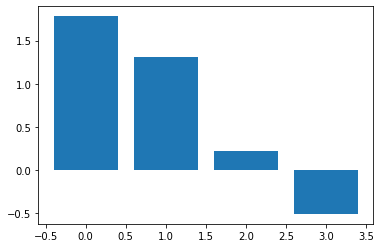

In [509]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(col_X_train, col_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [510]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(col_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(col_X_train, col_y_train)

RandomForestClassifier(random_state=14)

In [511]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

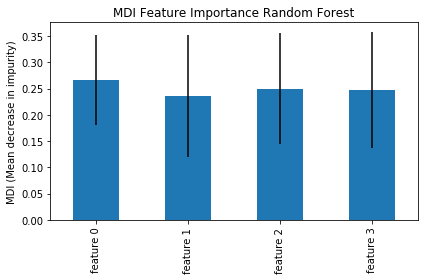

In [512]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [513]:
#correlation matrix

corr_matrix = a.corr()
print(corr_matrix)

                count_blinks  avg_diameter  fixation_count  saccade_count
count_blinks        1.000000      0.106140        0.499005       0.261232
avg_diameter        0.106140      1.000000        0.158398       0.206347
fixation_count      0.499005      0.158398        1.000000       0.766317
saccade_count       0.261232      0.206347        0.766317       1.000000


# Feature Importance second dataset 

In [514]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [515]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y']]

In [516]:
ml_target = final['task']

In [517]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(ml_features)
ml_features = model.transform(ml_features)


In [518]:
ml_features

array([[0.86725664, 0.625     , 0.31897905],
       [0.4159292 , 0.        , 0.12437295],
       [0.46902655, 0.25      , 0.18758537],
       [0.38053097, 0.        , 0.90351307],
       [0.27433628, 0.5625    , 0.39987114],
       [0.53982301, 0.75      , 0.08515155],
       [0.3539823 , 0.3125    , 0.42300373],
       [0.37168142, 0.1875    , 0.21690233],
       [0.40707965, 0.8125    , 0.23305645],
       [0.43362832, 0.0625    , 0.16644475],
       [0.47787611, 0.375     , 0.34371724],
       [1.        , 0.0625    , 0.26649772],
       [0.23893805, 0.3125    , 0.19475406],
       [0.46017699, 0.8125    , 0.38359201],
       [0.50442478, 0.0625    , 0.16796695],
       [0.61061947, 0.        , 0.30630159],
       [0.62831858, 0.75      , 0.03447364],
       [0.62831858, 0.5625    , 0.06156232],
       [0.45132743, 0.125     , 0.06741294],
       [0.53097345, 0.6875    , 0.18588788],
       [0.44247788, 1.        , 0.31548604],
       [0.42477876, 0.8125    , 0.11022188],
       [0.

In [519]:
#apply floor because python can't work out that 2.0 is 2
#ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].apply(np.floor)
#ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].apply(np.floor)
#ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].apply(np.floor)

In [520]:
#ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].astype(int)
#ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].astype(int)
#ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].astype(int)

In [521]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

Feature: 0, Score: -3.49056
Feature: 1, Score: -0.74157
Feature: 2, Score: -0.02115


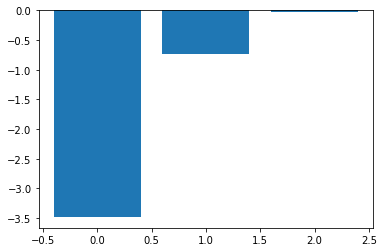

In [522]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(ml_X_train, ml_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [523]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(ml_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(ml_X_train, ml_y_train)

RandomForestClassifier(random_state=14)

In [524]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

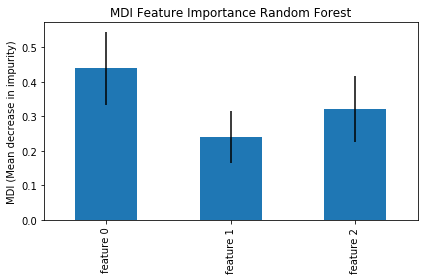

In [525]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [526]:
#correlation matrix

corr_matrix = final.corr()
print(corr_matrix)

                         RECORDING_SESSION_LABEL  CURRENT_SAC_DURATION  \
RECORDING_SESSION_LABEL                 1.000000              0.170621   
CURRENT_SAC_DURATION                    0.170621              1.000000   
CURRENT_SAC_BLINK_END                   0.308613              0.229473   
RIGHT_PUPIL_SIZE_y                     -0.113385             -0.027519   

                         CURRENT_SAC_BLINK_END  RIGHT_PUPIL_SIZE_y  
RECORDING_SESSION_LABEL               0.308613           -0.113385  
CURRENT_SAC_DURATION                  0.229473           -0.027519  
CURRENT_SAC_BLINK_END                 1.000000           -0.174784  
RIGHT_PUPIL_SIZE_y                   -0.174784            1.000000  


# SVM model

## COLET

In [527]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 3, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(col_X_train, col_y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [528]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'poly'}
SVC(C=100, gamma=1, kernel='poly')


In [566]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=0.001, kernel='rbf') 

# fit to training set
support_vc.fit(col_X_train,col_y_train)

# predictions on test set
y_pred=support_vc.predict(col_X_test)

#accuracy score
acc = accuracy_score(col_y_test,y_pred)

# F1 score

print(classification_report(col_y_test, y_pred, digits=4))
print('accuracy:')
print(acc)

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        16
           2     0.0000    0.0000    0.0000        11
           3     0.1000    1.0000    0.1818         3

    accuracy                         0.1000        30
   macro avg     0.0333    0.3333    0.0606        30
weighted avg     0.0100    0.1000    0.0182        30

accuracy:
0.1


## Second Dataset

In [530]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 3, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(ml_X_train, ml_y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [531]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=100, gamma=1, kernel='sigmoid')


In [532]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=100, gamma=1, kernel='sigmoid') 

# fit to training set
support_vc.fit(ml_X_train,ml_y_train)

# predictions on test set
y_pred=support_vc.predict(ml_X_test)

#accuracy score
acc = accuracy_score(ml_y_test,y_pred)

# F1 score

print(classification_report(ml_y_test, y_pred, digits=4))
print('accuracy:')
print(acc)

              precision    recall  f1-score   support

           1     0.4167    0.8333    0.5556         6
           2     0.0000    0.0000    0.0000         9
           3     0.6667    0.5000    0.5714         4
           4     0.4000    0.5000    0.4444         8

    accuracy                         0.4074        27
   macro avg     0.3708    0.4583    0.3929        27
weighted avg     0.3099    0.4074    0.3398        27

accuracy:
0.4074074074074074


# CART

In [547]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6,8,10],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10,0.2,0.4],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10,0.2,0.4]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [548]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(col_X_train, col_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [565]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 2, max_features = 0.2, min_samples_leaf = 0.04, random_state = 50)
final_model.fit(col_X_train, col_y_train)
end = time.time()
print(final_model)
#pringint the total time taken - gives us an idea of computational complexity
#test them 
expected_y  = col_y_test
predicted_y = final_model.predict(col_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(col_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(col_X_test, col_y_test)))


DecisionTreeClassifier(max_depth=2, max_features=0.2, min_samples_leaf=0.04,
                       random_state=50)
Accuracy of CART classifier on test set: 0.5000


# Data 2

In [536]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [537]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(ml_X_train, ml_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.1}


In [538]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.1)
final_model.fit(ml_X_train, ml_y_train)
end = time.time()
print(final_model)
#pringint the total time taken - gives us an idea of computational complexity
total_time_taken = end - start
print('Execution time for Decision Tree:', total_time_taken, 'seconds')
#test them 
expected_y  = ml_y_test
predicted_y = final_model.predict(ml_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(ml_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(ml_X_test, ml_y_test)))


DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.1)
Execution time for Decision Tree: 35412.03246021271 seconds
Accuracy of CART classifier on test set: 0.1481


# GNB

# Colet

In [552]:


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)


In [553]:
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(col_X_test)

gs_NB.fit(Data_transformed, col_y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [554]:
gs_NB.best_params_

{'var_smoothing': 0.02848035868435802}

In [555]:
nb = GaussianNB(var_smoothing = 0.02848035868435802)
nb.fit(col_X_train, col_y_train)
# make predictions on test set
y_pred=nb.predict(col_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(col_y_test,y_pred)

In [556]:
print(acc)

0.5666666666666667


# MLA

In [557]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(ml_X_test)

gs_NB.fit(Data_transformed, ml_y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [559]:
gs_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [560]:
nb = GaussianNB(var_smoothing = 0.657933224657568)
nb.fit(ml_X_train, ml_y_train)
# make predictions on test set
y_pred=nb.predict(ml_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(ml_y_test,y_pred)

In [561]:
print(acc)

0.25925925925925924
